# 0. Description

* WO - without types (ignoring method) 
* IE - inner encoded types (diversified training method)

In [1]:
import json
from collections import defaultdict
from itertools import product
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt


path_to_bert_base = Path('../../etc/models/bert_base')

# 1. WO results

In [2]:
file_names = ['em_42', 'em_119', 'em_231']

wo_dev_results = []
wo_test_results = []
for file_name in file_names:
    with (path_to_bert_base / file_name / "test_results.json").open('r') as file:
        res = json.load(file)
        wo_test_results.append(res["f1"])
    with (path_to_bert_base / file_name / "eval_results.json").open('r') as file:
        res = json.load(file)
        wo_dev_results.append(res["f1"])
        
wo_dev_mean = np.mean(wo_dev_results)
wo_dev_std = np.std(wo_dev_results)        
    
print(f'Dev mean {wo_dev_mean}')
print(f'Dev std {wo_dev_std}\n')

print(f'Test mean {np.mean(wo_test_results)}')
print(f'Test std {np.std(wo_test_results)}')

Dev mean 0.7652353389335982
Dev std 0.0014102757676277859

Test mean 0.7664161012799263
Test std 0.0037310484142847027


# 2. IE results

## 2.1 Dev results

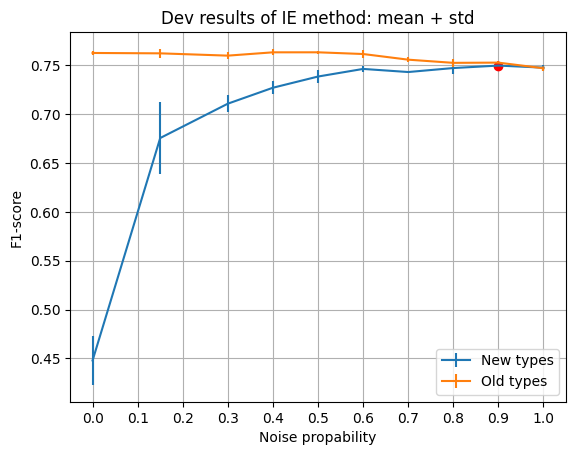

In [3]:
noise_prob = [0.0, 0.15, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
seeds = ['42', '119', '231']

ie_dev_new_tmp = defaultdict(list)
ie_dev_old_tmp = defaultdict(list)
for noise_p, s in product(noise_prob, seeds):
    
    file_name = 'div_dtem_{}_{}'.format(str(noise_p).replace('.', ''), s)
    file = path_to_bert_base / file_name / "eval_results.json"
    
    with file.open('r') as f:
        res = json.load(f)
        ie_dev_new_tmp[noise_p].append(res['f1'])
        
    file = path_to_bert_base / file_name / "eval_results_old.json"
    
    with file.open('r') as f:
        res = json.load(f)
        ie_dev_old_tmp[noise_p].append(res['f1'])

ie_dev_new = defaultdict(dict)
for key, value in ie_dev_new_tmp.items():
    ie_dev_new[key]['mean'] = np.mean(value)
    ie_dev_new[key]['std'] = np.std(value)
    
ie_dev_old = defaultdict(dict)
for key, value in ie_dev_old_tmp.items():
    ie_dev_old[key]['mean'] = np.mean(value)
    ie_dev_old[key]['std'] = np.std(value)

n_mean = [ie_dev_new[key]['mean'] for key in noise_prob]
n_std = [ie_dev_new[key]['std'] for key in noise_prob]

n_mean_old = [ie_dev_old[key]['mean'] for key in noise_prob]
n_std_old = [ie_dev_old[key]['std'] for key in noise_prob]

n_mean_max = np.max(n_mean)
n_mean_max_arg = np.argmax(n_mean)

plt.errorbar(noise_prob, n_mean, n_std, label='New types')
plt.errorbar(noise_prob, n_mean_old, n_std_old, label='Old types')
plt.plot(noise_prob[n_mean_max_arg], n_mean_max, 'ro')

plt.ylabel('F1-score')
plt.xlabel('Noise propability')
plt.title('Dev results of IE method: mean + std')
plt.xticks(np.arange(0, 1.1, step=0.1)) 
plt.grid()
plt.legend(loc=4)
plt.show()

## 2.2 Test results

In [4]:
ie_test_results = []
for s in seeds:
    file_name = 'div_dtem_{}_{}'.format(str(noise_prob[n_mean_max_arg]).replace('.', ''), s)
    
    file = path_to_bert_base / file_name / "eval_results.json"
    
    with file.open('r') as f:
        res = json.load(f)
        ie_test_results.append(res['f1'])
        
print(f'Test mean {np.mean(ie_test_results)}')
print(f'Test std {np.std(ie_test_results)}')

Test mean 0.7496885718987172
Test std 0.0020414270863379153
